<a href="https://colab.research.google.com/github/Arhammanj/Arhammanj/blob/main/Project2_Data_science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
import pandas as pd

file_path = "/content/drive/MyDrive/Sales Report.csv"
df = pd.read_csv(file_path)


/tmp/ipython-input-4188620806.py:4: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [21]:
df.head(10)
df.tail(10)



,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128965,128965,408-5154281-4593912,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,J0119,J0119-TP-XXXL,Top,...,INR,574.0,Prayagraj (ALLAHABAD),UTTAR PRADESH,211007.0,IN,NaN,False,NaN,False
128966,128966,406-9812666-2474761,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET224,SET224-KR-NP-XS,Set,...,INR,1132.0,CHENNAI 600042,TAMIL NADU,600042.0,IN,NaN,False,NaN,False
128967,128967,404-5182288-1653947,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,JNE3638,JNE3638-KR-XS,kurta,...,NaN,NaN,Kolkata,WEST BENGAL,700040.0,IN,NaN,False,NaN,False
128968,128968,403-7059995-7618722,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET264,SET264-KR-NP-XL,Set,...,INR,824.0,Delhi,DELHI,110053.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128969,128969,404-3802633-7250760,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET044,SET044-KR-NP-M,Set,...,INR,612.0,MUMBAI,MAHARASHTRA,400017.0,IN,NaN,False,NaN,False
128970,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128971,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128972,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128973,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128974,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [22]:
df.shape



(128975, 24)

In [23]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()
datetime_cols = df.select_dtypes(include='datetime').columns.tolist()

numerical_cols, categorical_cols, datetime_cols


(['index', 'Qty', 'Amount', 'ship-postal-code'],
 ['Order ID',
  'Date',
  'Status',
  'Fulfilment',
  'Sales Channel ',
  'ship-service-level',
  'Style',
  'SKU',
  'Category',
  'Size',
  'ASIN',
  'Courier Status',
  'currency',
  'ship-city',
  'ship-state',
  'ship-country',
  'promotion-ids',
  'fulfilled-by',
  'Unnamed: 22'],
 [])

In [24]:
profiling = pd.DataFrame({
    "Attribute": df.columns,
    "Type": df.dtypes.astype(str),
    "Missing %": (df.isnull().sum() / len(df)) * 100,
    "Unique Values": df.nunique()
})

profiling


,Attribute,Type,Missing %,Unique Values
index,index,int64,0.000000,128975
Order ID,Order ID,object,0.000000,120378
Date,Date,object,0.000000,91
Status,Status,object,0.000000,13
Fulfilment,Fulfilment,object,0.000000,2
Sales Channel,Sales Channel,object,0.000000,2
ship-service-level,ship-service-level,object,0.000000,2
Style,Style,object,0.000000,1377
SKU,SKU,object,0.000000,7195
Category,Category,object,0.000000,9


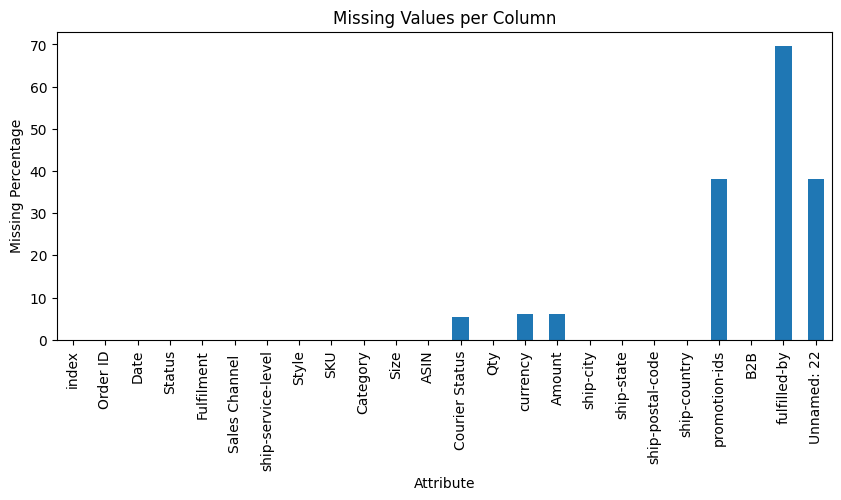

In [25]:
plt.figure(figsize=(10,4))
profiling.set_index("Attribute")["Missing %"].plot(kind='bar')
plt.ylabel("Missing Percentage")
plt.title("Missing Values per Column")
plt.show()


In [26]:
df[numerical_cols].mean()
df[numerical_cols].median()
df[numerical_cols].mode().iloc[0]
df[numerical_cols].std()
df[numerical_cols].min()
df[numerical_cols].max()


,0
index,128974.0
Qty,15.0
Amount,5584.0
ship-postal-code,989898.0


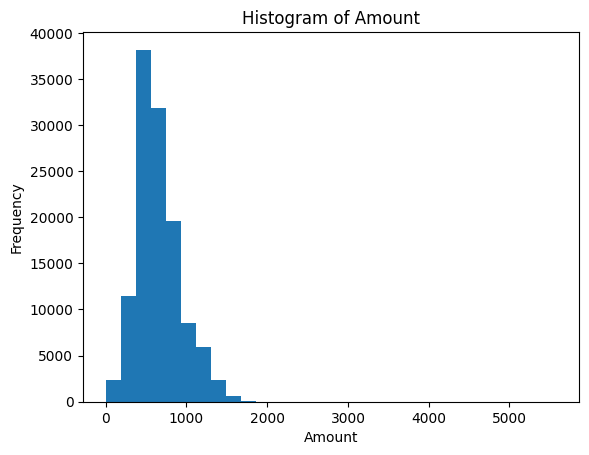

In [27]:
plt.hist(df['Amount'], bins=30)
plt.title("Histogram of Amount")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.show()


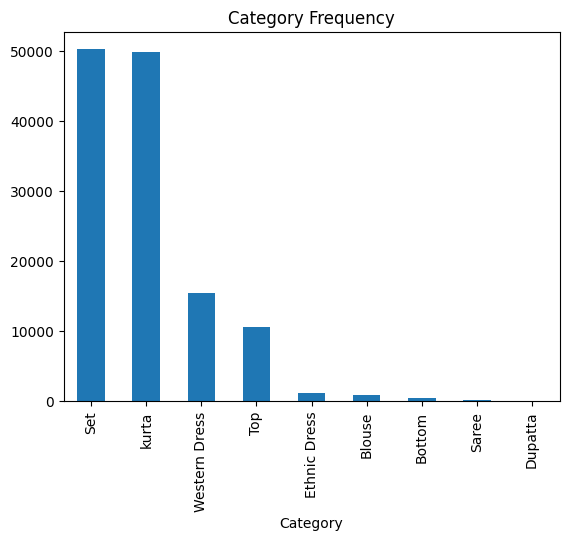

In [28]:
df['Category'].value_counts().plot(kind='bar')
plt.title("Category Frequency")
plt.show()



Deep Cleaning

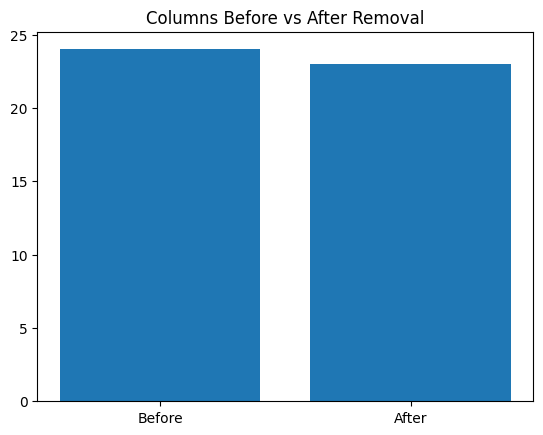

In [29]:
before_cols = df.shape[1]

df.drop(columns=['Order ID','Tracking ID','URL'], errors='ignore', inplace=True)

after_cols = df.shape[1]
plt.bar(['Before','After'], [before_cols, after_cols])
plt.title("Columns Before vs After Removal")
plt.show()



In [30]:
df_mean = df.copy()
df_median = df.copy()

df_mean[numerical_cols] = df_mean[numerical_cols].fillna(df_mean[numerical_cols].mean())
df_median[numerical_cols] = df_median[numerical_cols].fillna(df_median[numerical_cols].median())


In [32]:
existing_categorical_cols = [col for col in categorical_cols if col in df.columns]

for col in existing_categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

/tmp/ipython-input-1499935879.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-1499935879.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col].fillna(df[col].mode()[0], inplace=True)


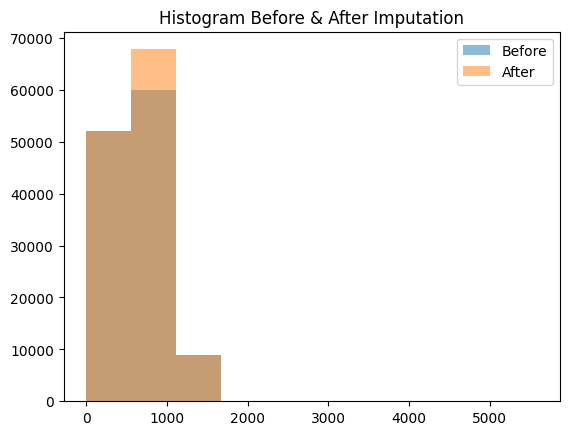

In [33]:
plt.hist(df["Amount"], alpha=0.5, label="Before")
plt.hist(df_mean["Amount"], alpha=0.5, label="After")
plt.legend()
plt.title("Histogram Before & After Imputation")
plt.show()


In [34]:
duplicates_before = df.duplicated().sum()
df.drop_duplicates(inplace=True)
duplicates_after = df.duplicated().sum()


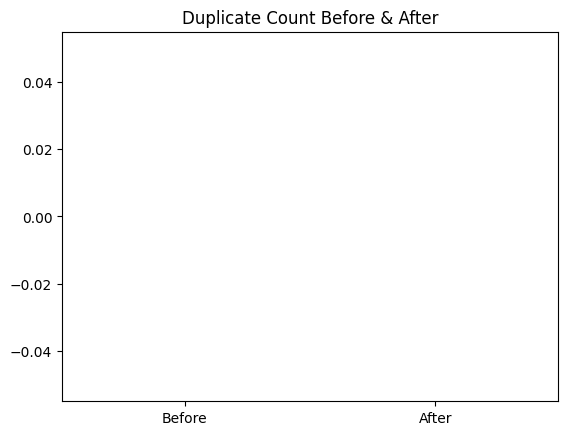

In [35]:
plt.bar(["Before", "After"], [duplicates_before, duplicates_after])
plt.title("Duplicate Count Before & After")
plt.show()


In [36]:
from scipy.stats import zscore

df["Z_Score"] = zscore(df["Amount"])
outliers = df[np.abs(df["Z_Score"]) > 3]


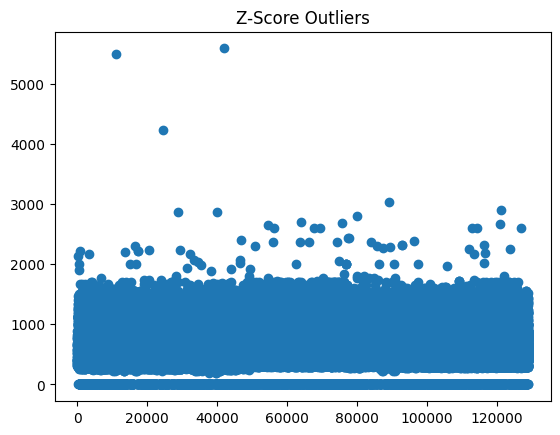

In [37]:
plt.scatter(range(len(df)), df["Amount"])
plt.scatter(outliers.index, outliers["Amount"])
plt.title("Z-Score Outliers")
plt.show()


In [38]:
Q1 = df["Amount"].quantile(0.25)
Q3 = df["Amount"].quantile(0.75)
IQR = Q3 - Q1


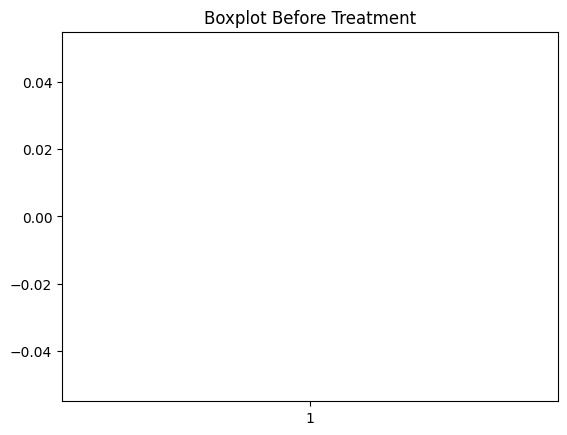

In [39]:
plt.boxplot(df["Amount"])
plt.title("Boxplot Before Treatment")
plt.show()


In [40]:
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

df["Amount"] = np.clip(df["Amount"], lower_limit, upper_limit)


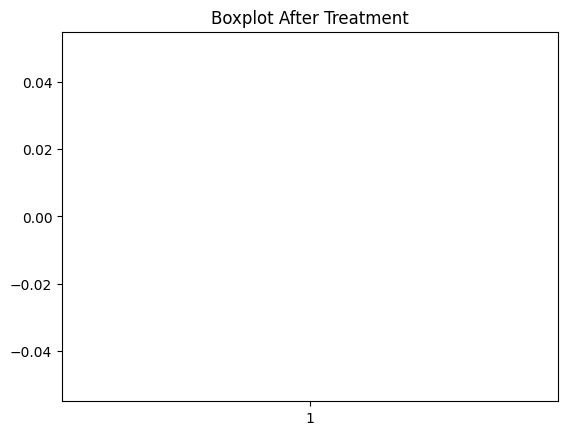

In [41]:
plt.boxplot(df["Amount"])
plt.title("Boxplot After Treatment")
plt.show()


data transformation and

In [42]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["Amount_MinMax"] = scaler.fit_transform(df[["Amount"]])


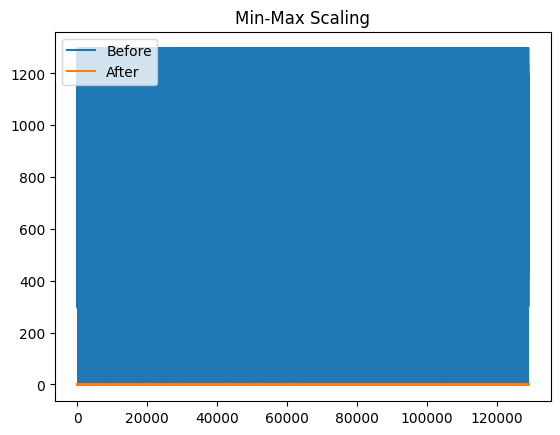

In [43]:
plt.plot(df["Amount"], label="Before")
plt.plot(df["Amount_MinMax"], label="After")
plt.legend()
plt.title("Min-Max Scaling")
plt.show()


In [52]:
df["Quantity_Z"] = zscore(df["Qty"])

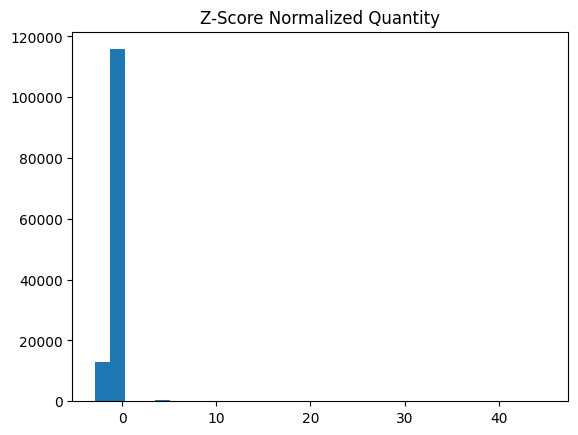

In [53]:
plt.hist(df["Quantity_Z"], bins=30)
plt.title("Z-Score Normalized Quantity")
plt.show()


In [54]:
percentiles = np.percentile(df["Amount"], [10, 25, 50, 75, 90])
percentiles


array([nan, nan, nan, nan, nan])

cato

In [49]:
before_features = df.shape[1]

df_encoded = pd.get_dummies(df, columns=["Category", "Fulfilment", "Sales Channel "])

after_features = df_encoded.shape[1]

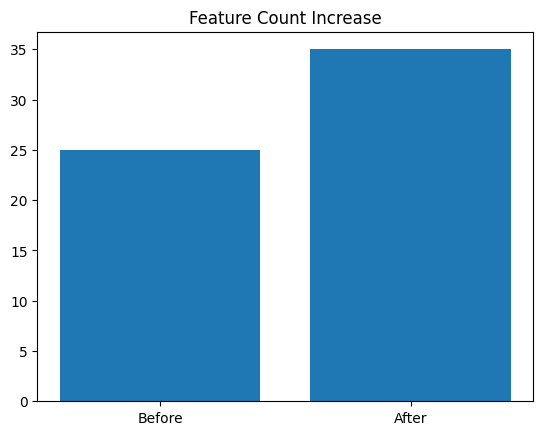

In [50]:
plt.bar(["Before", "After"], [before_features, after_features])
plt.title("Feature Count Increase")
plt.show()


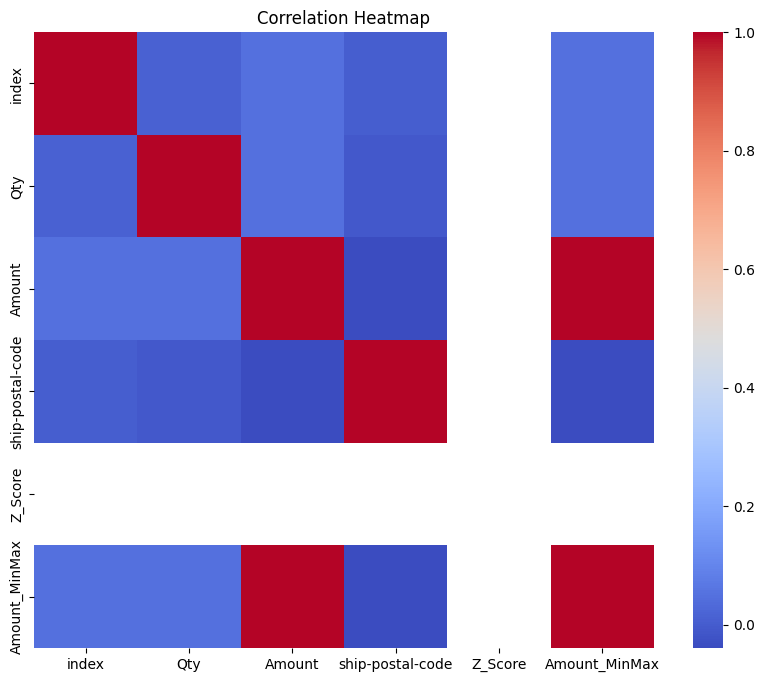

In [55]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.select_dtypes(np.number).corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


Clustring

In [58]:
from sklearn.cluster import KMeans

X = df_encoded.select_dtypes(np.number)

# Impute NaN values in X before clustering
X_imputed = X.fillna(X.mean())

# Further imputation for any columns that might still have NaNs (e.g., if they were all NaN initially)
# This handles cases where X.mean() might return NaN if a column is entirely NaN
for col in X_imputed.columns:
    if X_imputed[col].isnull().any():
        X_imputed[col].fillna(0, inplace=True)

wcss = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10) # Added n_init to suppress warning
    kmeans.fit(X_imputed) # Use the imputed data
    wcss.append(kmeans.inertia_)

/tmp/ipython-input-3815937561.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_imputed[col].fillna(0, inplace=True)


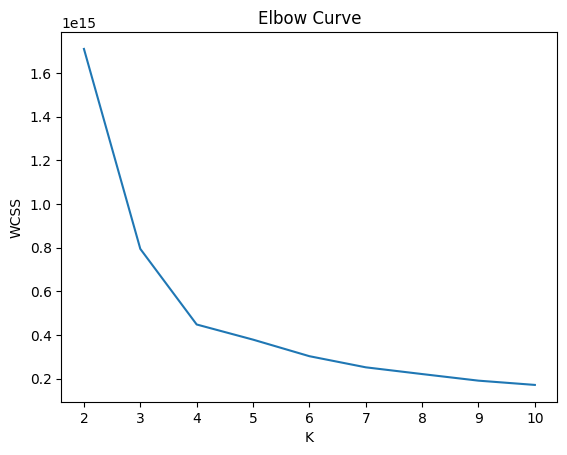

In [59]:
plt.plot(range(2, 11), wcss)
plt.title("Elbow Curve")
plt.xlabel("K")
plt.ylabel("WCSS")
plt.show()


apply k-mean

In [62]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df_encoded["Cluster"] = kmeans.fit_predict(X_imputed)